In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = '/Users/syedafjal/Documents/Banking Dataset - Marketing Targets(pandas)/train.csv'
all_data = pd.read_csv(file_path, delimiter=';')
all_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Cleaning the data¶

In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# Checking for missing values
missing_values = all_data.isnull().sum()
print(missing_values)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [6]:
# Handle inconsistent data - For example, let's make sure binary columns have consistent values
# Ensure 'default', 'housing', 'loan' columns only have 'yes' or 'no'
binary_columns = ['default', 'housing', 'loan']
for col in binary_columns:
    print(f"Unique values in {col}: {all_data[col].unique()}")

Unique values in default: ['no' 'yes']
Unique values in housing: ['yes' 'no']
Unique values in loan: ['no' 'yes']


In [7]:
 all_data = all_data.drop_duplicates()

# Exploratory Data Analysis (EDA)

## Problem 1: Which contact communication type (telephone or cellular) is more effective in converting customers?

In [8]:
all_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


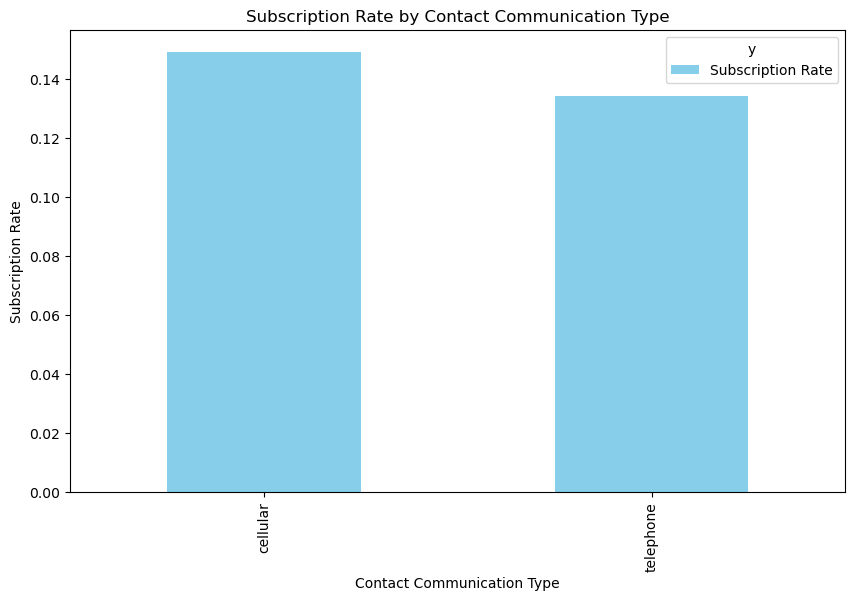

<Figure size 640x480 with 0 Axes>

In [10]:
# Filter out the 'unknown' contact type
filtered_data = all_data[all_data['contact'].isin(['cellular', 'telephone'])]

# Calculate the subscription rate for each contact type
subscription_rate = filtered_data.groupby('contact')['y'].value_counts(normalize=True).unstack().fillna(0)
subscription_rate = subscription_rate.rename(columns={'yes': 'Subscription Rate', 'no': 'Non-Subscription Rate'})

# Plot the subscription rate
subscription_rate[['Subscription Rate']].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Subscription Rate by Contact Communication Type')
plt.xlabel('Contact Communication Type')
plt.ylabel('Subscription Rate')
plt.show()
plt.savefig('conversion_by_contact.png')


## Problem 2:What is the age distribution of customers who were contacted, and how does age relate to the likelihood of subscribing to a term deposit?

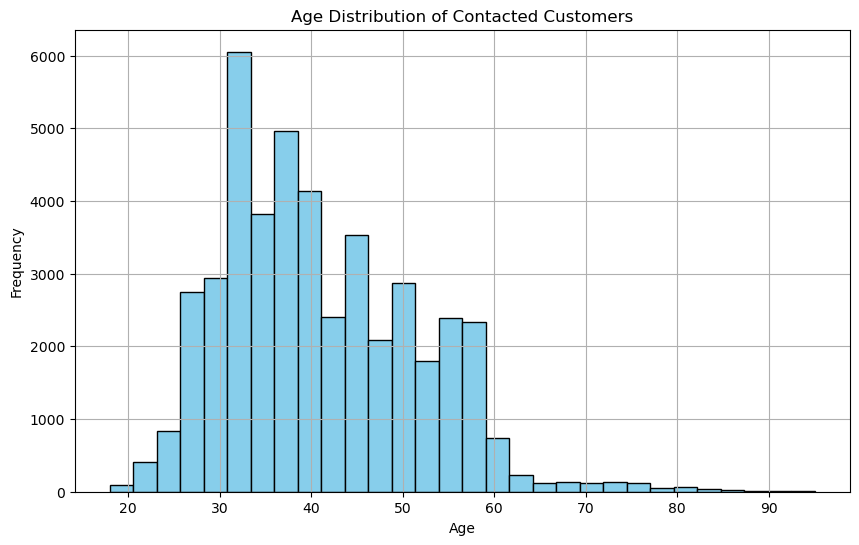

In [17]:
# Plotting the age distribution
plt.figure(figsize=(10, 6))
plt.hist(all_data['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Contacted Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/var/folders/lr/0t04h8qd1v92yszgsq68tr2r0000gn/T/ipykernel_59316/823327348.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_subs_rate = all_data.groupby('age_group')['y'].apply(lambda x: (x == 'yes').sum() / len(x))


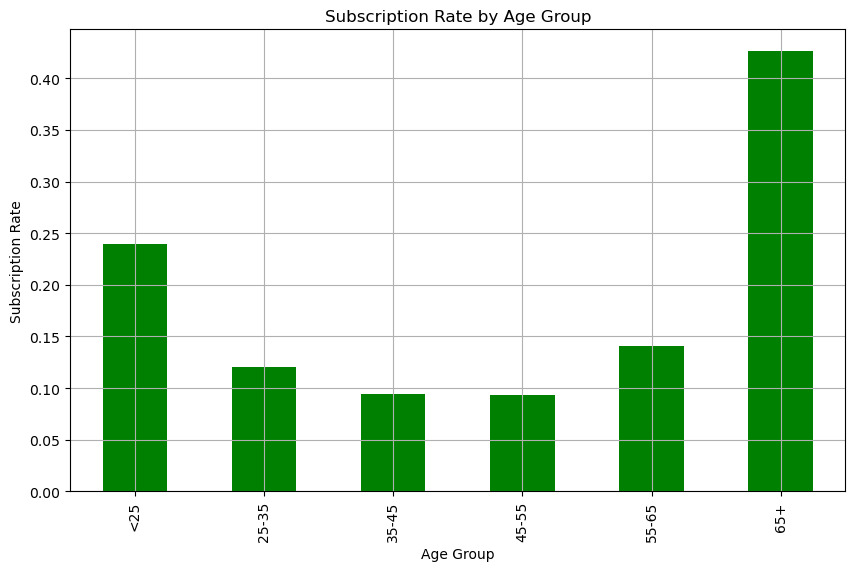

In [18]:
# Categorize age into bins
all_data['age_group'] = pd.cut(all_data['age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+'])

# Calculate the subscription rate per age group
age_subs_rate = all_data.groupby('age_group')['y'].apply(lambda x: (x == 'yes').sum() / len(x))

# Plotting the subscription rate by age group
plt.figure(figsize=(10, 6))
age_subs_rate.plot(kind='bar', color='green')
plt.title('Subscription Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.grid(True)
plt.show()

## Problem 3: Does marital status affect the success rate of these marketing campaigns?

In [20]:
# Creating a new column for easier analysis
all_data['subscribed'] = all_data['y'].map({'yes': 1, 'no': 0})
all_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,55-65,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,35-45,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,25-35,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,45-55,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,25-35,0


In [23]:
# Calculate the subscription rate by marital status
subscription_rates = all_data.groupby('marital')['subscribed'].mean()

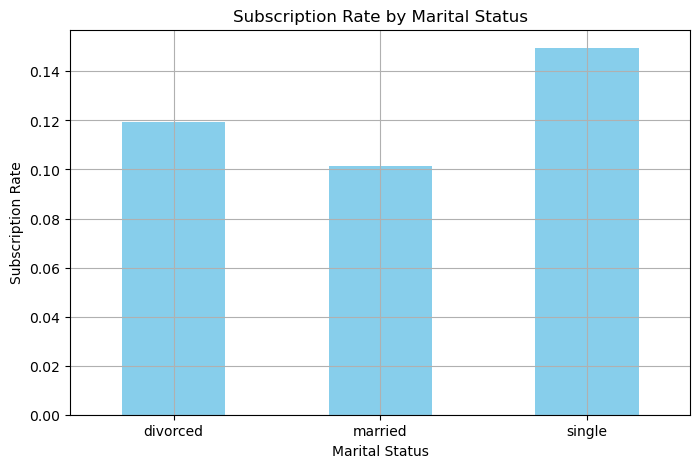

In [24]:
# Plotting the subscription rate by marital status
plt.figure(figsize=(8, 5))
subscription_rates.plot(kind='bar', color='skyblue')
plt.title('Subscription Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=0)  # Keep the labels horizontal for better readability
plt.grid(True)
plt.show()

## Problem 4: Analyzing the distribution and impact of the balance on the likelihood of subscribing to a term deposit.

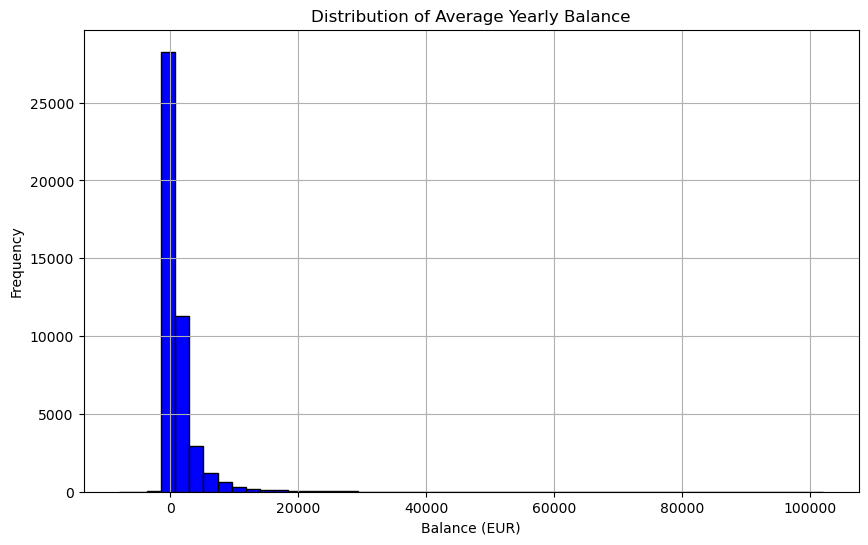

In [25]:
# Plotting the balance distribution
plt.figure(figsize=(10, 6))
plt.hist(all_data['balance'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Average Yearly Balance')
plt.xlabel('Balance (EUR)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

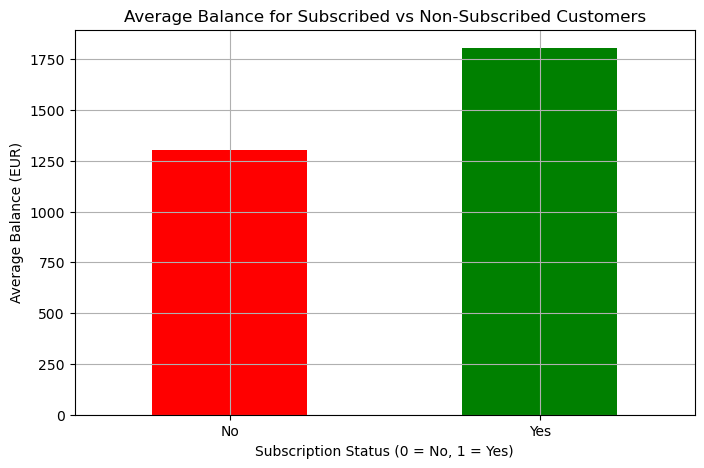

In [26]:
# Grouping by subscription status and calculating average balance
average_balance_by_subscription = all_data.groupby('subscribed')['balance'].mean()

# Plotting average balance by subscription status
plt.figure(figsize=(8, 5))
average_balance_by_subscription.plot(kind='bar', color=['red', 'green'])
plt.title('Average Balance for Subscribed vs Non-Subscribed Customers')
plt.xlabel('Subscription Status (0 = No, 1 = Yes)')
plt.ylabel('Average Balance (EUR)')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.grid(True)
plt.show()

## Problem 5: Is there any seasonal or monthly variation in the subscription rates to term deposits?

In [27]:
# Mapping month from string to numerical value to maintain chronological order
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
                 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
all_data['month'] = all_data['month'].map(month_mapping)
all_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no,55-65,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no,35-45,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no,25-35,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no,45-55,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no,25-35,0


In [28]:
# Group by month and calculate subscription rate
monthly_subscription_rate = all_data.groupby('month')['subscribed'].mean()

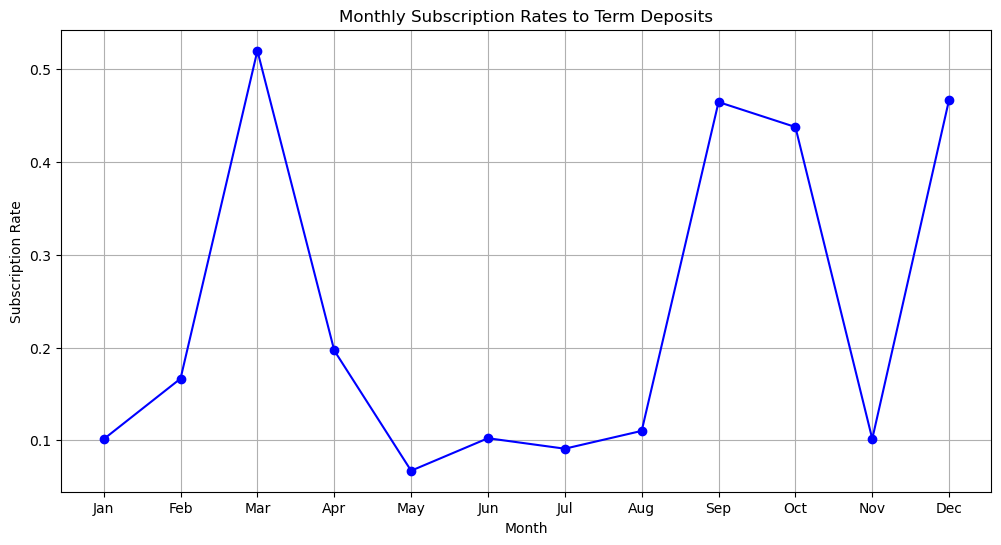

In [29]:
# Plotting the subscription rate by month
plt.figure(figsize=(12, 6))
plt.plot(monthly_subscription_rate.index, monthly_subscription_rate.values, marker='o', linestyle='-', color='b')
plt.title('Monthly Subscription Rates to Term Deposits')
plt.xlabel('Month')
plt.ylabel('Subscription Rate')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

## Problem 6: Analyze the distribution and impact of the balance on the likelihood of subscribing to a term deposit.

In [31]:
all_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no,55-65,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no,35-45,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no,25-35,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no,45-55,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no,25-35,0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


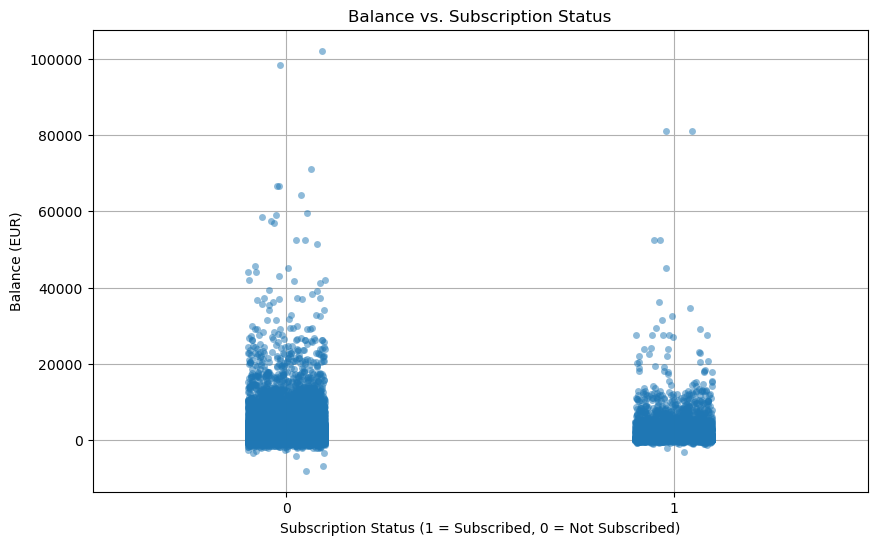

In [33]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='subscribed', y='balance', data=all_data, jitter=0.1, alpha=0.5)
plt.title('Balance vs. Subscription Status')
plt.xlabel('Subscription Status (1 = Subscribed, 0 = Not Subscribed)')
plt.ylabel('Balance (EUR)')
plt.grid(True)
plt.show()

## Problem 7: Compare the subscription rate of the previous campaign to the current campaign

In [38]:
# Adding new columns
all_data['subscribed_current'] = all_data['y'].apply(lambda x: 1 if x == 'yes' else 0)  # Current campaign
all_data['subscribed_previous'] = all_data['poutcome'].apply(lambda x: 1 if x == 'success' else 0)  # Previous campaign
all_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,age_group,subscribed,subscribed_current,subscribed_previous
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,55-65,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,35-45,0,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,25-35,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,45-55,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,no,25-35,0,0,0


In [39]:
# Calculate overall subscription rates
current_rate = all_data['subscribed_current'].mean()
previous_rate = all_data['subscribed_previous'].mean()

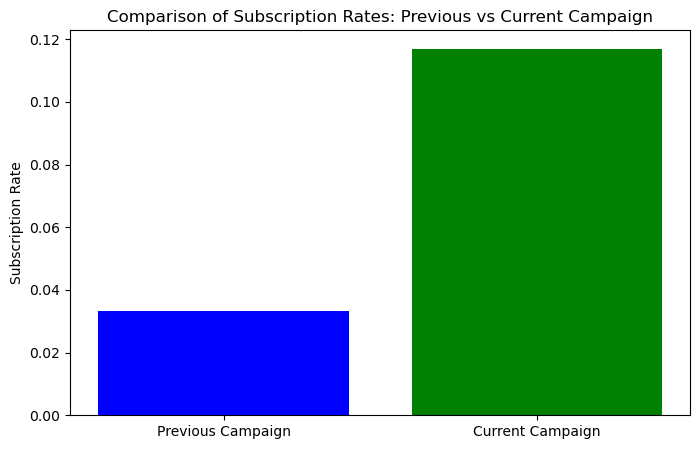

In [40]:
# Data to plot
rates = [previous_rate, current_rate]
campaigns = ['Previous Campaign', 'Current Campaign']

# Creating bar chart
plt.figure(figsize=(8, 5))
plt.bar(campaigns, rates, color=['blue', 'green'])
plt.title('Comparison of Subscription Rates: Previous vs Current Campaign')
plt.ylabel('Subscription Rate')
plt.show()